### Import thư viện

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Đọc dữ liệu

In [ ]:
telecom_churn_clean=pd.read_csv(r"T:\21068021_PhanNguyenKhoiNguyen_16-3-2024\data\telecom_churn_clean.csv")
telecom_churn_clean.head(10)

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,5,118,510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,6,121,510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,7,147,415,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,8,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
9,9,141,415,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


### Tìm biến mục tiêu

In [ ]:
# Lặp qua các cột để tìm biến mục tiêu
print("Các cột có biến mục tiêu là:")
for column in telecom_churn_clean.columns: #Duyệt qua từng cột
    unique_values = telecom_churn_clean[column].unique() #.unique(): Là một phương thức của Series trong pandas, nó trả về một mảng chứa tất cả các giá trị duy nhất trong cột đó. Điều này có nghĩa là nó loại bỏ các giá trị trùng lặp và chỉ giữ lại các giá trị duy nhất.
    if len(unique_values) == 2:  # Kiểm tra xem cột có đúng hai giá trị duy nhất hay không
       print(f"'{column}'")

Các cột có biến mục tiêu là:
'international_plan'
'voice_mail_plan'
'churn'


### Using cikit-learn to fit a classifier
- "Cikit-learn" (hay viết tắt là "scikit-learn") là một thư viện Python phổ biến cho machine learning và data mining. Cikit-learn cung cấp một loạt các thuật toán machine learning cơ bản và tiên tiến, cũng như các công cụ cho việc tiền xử lý dữ liệu và đánh giá mô hình.
- Khi sử dụng cikit-learn để fit một classifier (bộ phân loại), điều này thường ám chỉ việc sử dụng một trong các thuật toán học máy để huấn luyện một mô hình phân loại dựa trên dữ liệu đã được chuẩn bị trước.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#sklearn là một thư viện Python chứa nhiều công cụ và thuật toán cho machine learning. Tên đầy đủ của thư viện này là "scikit-learn".

# neighbors là một mô-đun trong scikit-learn chứa các thuật toán liên quan đến việc tìm kiếm hàng xóm (k-nearest neighbors) trong không gian dữ liệu.

# KNeighborsClassifier là một class trong mô-đun neighbors giúp triển khai thuật toán phân loại dựa trên k-nearest neighbors (KNN). KNN là một phương pháp đơn giản và phổ biến trong machine learning, nó dựa vào việc xác định nhãn của một điểm dữ liệu mới dựa trên nhãn của các điểm hàng xóm gần nhất trong không gian dữ liệu.

#### Giải thích (k-nearest neighbors) KNN ?
- K-nearest neighbors (KNN) là một thuật toán machine learning đơn giản và phổ biến được sử dụng cho cả hai loại tác vụ: phân loại và dự đoán giá trị. KNN được sử dụng chủ yếu trong việc phân loại, tuy nhiên, nó cũng có thể được áp dụng trong các tác vụ dự đoán giá trị bằng cách sử dụng giá trị trung bình hoặc trung vị của các điểm hàng xóm.

Cơ bản, KNN hoạt động như sau:

- Xây dựng mô hình: Trong quá trình huấn luyện, KNN không học từ dữ liệu mà chỉ đơn giản là lưu trữ tất cả các điểm dữ liệu trong bộ dữ liệu huấn luyện.

- Xác định điểm dữ liệu gần nhất: Khi cần dự đoán nhãn của một điểm dữ liệu mới, thuật toán tính toán khoảng cách (thường là khoảng cách Euclidean) giữa điểm dữ liệu mới và tất cả các điểm trong bộ dữ liệu huấn luyện.

- Chọn k hàng xóm gần nhất: KNN sau đó chọn k điểm dữ liệu gần nhất (k được chọn trước) từ bộ dữ liệu huấn luyện, dựa trên khoảng cách tính được.

- Phân loại (hoặc dự đoán) nhãn: Cuối cùng, KNN sử dụng đa số nhãn của k hàng xóm gần nhất (trong trường hợp phân loại) hoặc giá trị trung bình của các giá trị (trong trường hợp dự đoán giá trị) để dự đoán nhãn hoặc giá trị của điểm dữ liệu mới.

Một số điểm quan trọng về KNN:

- Giá trị k được chọn trước và có thể ảnh hưởng đến hiệu suất của mô hình.
- KNN là một thuật toán "lười" (lazy), nghĩa là không có quá trình học được thực hiện trong quá trình huấn luyện. Việc tính toán và phân loại diễn ra chỉ khi cần thiết, khi cần dự đoán cho một điểm dữ liệu mới.
- KNN có thể dễ dàng bị ảnh hưởng bởi các điểm nhiễu trong dữ liệu và cần có phương pháp phân loại để xử lý trường hợp này.

In [ ]:
X= telecom_churn_clean[['total_day_charge','total_eve_charge']].values

# Chọn hai cột từ DataFrame, là 'total_day_charge' và 'total_eve_charge', và chuyển chúng thành một mảng NumPy sử dụng phương thức values. Điều này có nghĩa là  đang lấy giá trị của hai cột này và biến chúng thành một mảng hai chiều, trong đó mỗi hàng là một mẫu dữ liệu và mỗi cột là một đặc trưng (feature). Kết quả của đoạn mã này được gán cho biến X.
y = telecom_churn_clean['churn'].values #Tương tự như trên
print(X.shape, y.shape) # X.shape sẽ cho biết số hàng và số cột của mảng X, tức là số lượng mẫu dữ liệu và số lượng đặc trưng. y.shape sẽ cho biết số lượng phần tử của mảng y, tức là số lượng nhãn. Điều này giúp kiểm tra xem liệu việc trích xuất dữ liệu đã thành công và có phù hợp không.

(3333, 2) (3333,)


In [ ]:
#Tạo một bộ phân loại KNN mới bằng cách sử dụng lớp KNeighborsClassifier từ thư viện scikit-learn
knn = KNeighborsClassifier(n_neighbors = 15) # n_neighbors (Tham số ) = 15.
#Tham số này xác định số lượng hàng xóm (k) mà thuật toán KNN sẽ sử dụng để phân loại một điểm dữ liệu mới. Trong trường hợp này, chúng ta chọn k = 15, có nghĩa là KNN sẽ sử dụng 15 điểm dữ liệu gần nhất để quyết định nhãn của điểm dữ liệu mới
knn.fit(X,y)
#Đoạn mã này huấn luyện mô hình KNN trên dữ liệu đã chuẩn bị trước đó. X là ma trận đặc trưng,
#chứa các điểm dữ liệu đầu vào, và y là vector nhãn tương ứng. Bằng cách gọi phương thức fit() trên đối tượng KNeighborsClassifier knn và truyền vào X và y, chúng ta đang yêu cầu thuật toán KNN học cách phân loại dữ liệu dựa trên
#các điểm dữ liệu đã được gán nhãn. Điều này bao gồm việc lưu trữ tất cả dữ liệu huấn luyện và cách tính khoảng cách giữa các điểm dữ liệu. Khi mô hình đã được huấn luyện,nó có thể được sử dụng để dự đoán nhãn của các điểm dữ liệu mới không được gán nhãn.

KNeighborsClassifier(n_neighbors=15)

### Predicting on unlabeled data

In [ ]:
X_new= np.array([[56.8,17.5],
                 [24.4,24.1],
                 [50.1,10.9]])
print(X_new.shape)

(3, 2)


In [ ]:
predictions = knn.predict(X_new)
#predictions = knn.predict(X_new): Đây là việc sử dụng mô hình knn đã được huấn luyện để dự đoán nhãn của các điểm dữ liệu mới, được biểu diễn bởi X_new. Mô hình KNN sử dụng các k hàng xóm gần nhất trong dữ liệu
# huấn luyện để dự đoán nhãn cho mỗi điểm dữ liệu mới này. Kết quả của quá trình dự đoán được gán cho biến predictions.
print('Predictions :{}'.format(predictions))
#print('Predictions :{}'.format(predictions)): Đoạn này in ra các dự đoán của mô hình. Các dự đoán này là các nhãn dự đoán cho các điểm dữ liệu mới. Câu lệnh format(predictions) sẽ chèn các giá trị của biến
#predictions vào chuỗi được định dạng {} trong câu lệnh print. Do đó, kết quả sẽ là danh sách các dự đoán được in ra màn hình.

Predictions :[1 0 0]


In [ ]:
### Train/Test split
from sklearn.model_selection import train_test_split #from sklearn.model_selection import train_test_split: Đoạn này nhập hàm train_test_split từ module sklearn.model_selection. Hàm này được sử dụng để chia dữ liệu thành hai tập con: một tập dữ liệu huấn luyện và một tập dữ liệu kiểm tra.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state = 21, stratify = y)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y):
#Đây là việc sử dụng hàm train_test_split để chia dữ liệu thành tập huấn luyện và tập kiểm tra. Cụ thể:
 #X là ma trận đặc trưng.
 #y là vector nhãn.
 #test_size=0.3 xác định tỷ lệ dữ liệu được chia cho tập kiểm tra (30% trong trường hợp này).
 #random_state=21 là một số nguyên dùng để tạo ra một seed cho quá trình chia dữ liệu. Điều này đảm bảo rằng mỗi lần chạy sẽ cho kết quả tương tự.
 #stratify=y đảm bảo rằng phân phối của nhãn trong cả tập huấn luyện và tập kiểm tra giống nhau.
#Kết quả của hàm này là X_train, X_test là ma trận đặc trưng của tập huấn luyện và tập kiểm tra, y_train, y_test là vector nhãn tương ứng.

knn = KNeighborsClassifier(n_neighbors = 6) #knn = KNeighborsClassifier(n_neighbors=6): Đây là việc khởi tạo một mô hình K-nearest neighbors (KNN) với n_neighbors = 6, có nghĩa là mô hình sẽ sử dụng 6 hàng xóm gần nhất để phân loại mỗi điểm dữ liệu.
knn.fit(X_train, y_train) #knn.fit(X_train, y_train): Đoạn mã này huấn luyện mô hình KNN trên tập dữ liệu huấn luyện X_train, y_train. Mô hình sẽ học cách phân loại các điểm dữ liệu dựa trên dữ liệu huấn luyện này.
print(knn.score(X_test, y_test)) #print(knn.score(X_test, y_test)): Đoạn này tính và in ra điểm số (score) của mô hình trên tập kiểm tra X_test, y_test. Điểm số là tỷ lệ của các dự đoán chính xác so với tổng số mẫu trong tập kiểm tra. Điểm số càng cao, mô hình càng tốt.

0.872


#### Model complexity curve

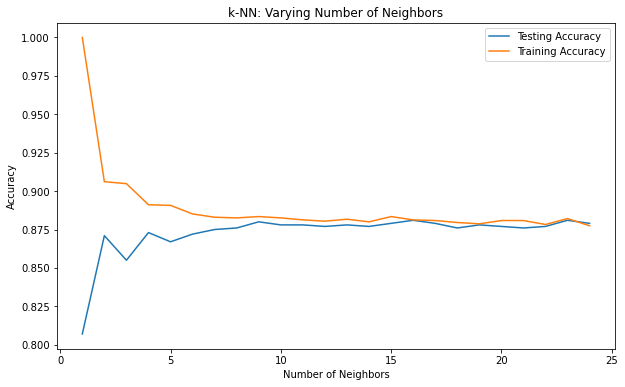

In [ ]:

neighbors = np.arange(1,25) #neighbors = np.arange(1,25): Tạo một mảng neighbors từ 1 đến 24, đại diện cho số lượng hàng xóm mà chúng ta muốn thử nghiệm.
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
#à hai mảng trống có độ dài bằng với độ dài của neighbors. Chúng sẽ được sử dụng để lưu trữ độ chính xác của mô hình trên tập huấn luyện và tập kiểm tra tương ứng.
for i,k in enumerate(neighbors): #lặp qua mỗi giá trị trong mảng neighbors. enumerate được sử dụng để lặp qua cả giá trị và chỉ số của chúng.
    knn = KNeighborsClassifier(n_neighbors=k) #Trong mỗi lần lặp, ta tạo một mô hình KNN mới với số lượng hàng xóm là k bằng cách sử dụng KNeighborsClassifier(n_neighbors=k).
    knn.fit(X_train,y_train) #Sau đó, mô hình được huấn luyện trên tập huấn luyện bằng cách sử dụng phương thức fit(X_train, y_train).
    train_accuracy[i] = knn.score(X_train,y_train) #Độ chính xác của mô hình trên "tập huấn luyện" được tính toán bằng cách sử dụng phương thức score(X_train, y_train) và được lưu vào mảng train_accuracy tại vị trí thứ i.
    test_accuracy[i] = knn.score(X_test,y_test) #Tương tự, độ chính xác của mô hình trên "tập kiểm tra" được tính toán bằng cách sử dụng phương thức score(X_test, y_test) và được lưu vào mảng test_accuracy tại vị trí thứ i.


plt.figure(figsize=(10,6))
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors,test_accuracy,label='Testing Accuracy')
plt.plot(neighbors,train_accuracy,label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#### Overfitting và Underfitting
Overfitting và Underfitting là hai vấn đề quan trọng trong machine learning khi xây dựng mô hình, và chúng đều liên quan đến việc mô hình không thể tổng quát hóa dữ liệu một cách hiệu quả.

* Overfitting:
Overfitting xảy ra khi mô hình quá phức tạp và quá nhạy cảm đối với nhiễu hoặc chi tiết không quan trọng trong dữ liệu huấn luyện.
Kết quả là mô hình hoạt động tốt trên dữ liệu huấn luyện nhưng hiệu suất trên dữ liệu mới không được ghi nhận trở lên kém hơn.
Dấu hiệu của overfitting bao gồm độ chính xác cao trên tập huấn luyện nhưng thấp trên tập kiểm tra, sự biến động lớn trong hiệu suất khi thay đổi dữ liệu huấn luyện, và mô hình có số lượng tham số lớn.
* Underfitting:
Underfitting xảy ra khi mô hình quá đơn giản hoặc không đủ phức tạp để mô hình hóa các mẫu dữ liệu huấn luyện.
Kết quả là mô hình không học được đủ thông tin từ dữ liệu huấn luyện và không thể tổng quát hóa dữ liệu mới một cách hiệu quả.
Dấu hiệu của underfitting bao gồm độ chính xác thấp trên cả tập huấn luyện và tập kiểm tra, hiệu suất không cải thiện khi tăng kích thước dữ liệu huấn luyện, và mô hình quá đơn giản so với tổng phức tạp của dữ liệu.
Để giải quyết vấn đề này, chúng ta cần sử dụng các kỹ thuật như tăng cường dữ liệu, giảm thiểu số lượng đặc trưng, sử dụng kỹ thuật chọn mô hình, và sử dụng kỹ thuật đánh giá hiệu suất mô hình một cách cẩn thận trên dữ liệu kiểm tra.